In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print(tf.__version__)

2.7.0


In [ ]:
#Load the mnist database
digits_mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = digits_mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
model = keras.Sequential()
#flatten layer
model.add(keras.layers.Flatten(input_shape=(28,28)))
#dense layer
model.add(keras.layers.Dense(128, activation = 'relu'))
#output layer
model.add(keras.layers.Dense(10, activation = 'softmax'))


In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=300)


Epoch 1/300
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0022 - accuracy: 0.9996
Epoch 2/300
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0021 - accuracy: 0.9994
Epoch 3/300
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0022 - accuracy: 0.9995
Epoch 4/300
1875/1875 [==============================] - 5s 3ms/step - loss: 9.9909e-04 - accuracy: 0.9998
Epoch 5/300
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0012 - accuracy: 0.9997
Epoch 6/300
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0020 - accuracy: 0.9996
Epoch 7/300
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0021 - accuracy: 0.9995
Epoch 8/300
1875/1875 [==============================] - 5s 3ms/step - loss: 2.7867e-04 - accuracy: 0.9999
Epoch 9/300
1875/1875 [==============================] - 5s 3ms/step - loss: 3.2233e-04 - accuracy: 0.9999
Epoch 10/300
1875/1875 [==============================] - 5s 

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 2)
print('\nTest Accuracy: ', test_acc)

313/313 - 1s - loss: 0.3936 - accuracy: 0.9786 - 627ms/epoch - 2ms/step

Test Accuracy:  0.978600025177002


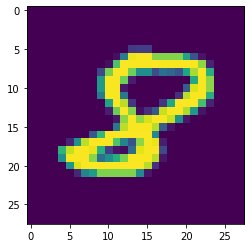

Ground Truth:  8
Predicted Digit Probabilities:  [[3.95911250e-08 2.16935341e-11 2.53893581e-04 6.01157808e-08
  1.01169344e-10 1.18646684e-08 2.49001197e-09 4.36729708e-10
  9.99746025e-01 8.69964517e-11]]
Predicted Digit:  8


In [ ]:
k = 61


test_image = x_test[k]
plt.imshow(test_image)
plt.show()
print("Ground Truth: ", y_test[k])

input = np.expand_dims(test_image, axis = 0)
predicted_digit_probabilities = model.predict(input)
print("Predicted Digit Probabilities: ", predicted_digit_probabilities)

predicted_digit = np.argmax(predicted_digit_probabilities)
print("Predicted Digit: ", predicted_digit)



In [ ]:
import os
import glob
import numpy as np
from PIL import Image

x_custom = []
y_custom = []
paths = glob.glob("/content/drive/MyDrive/my_data/*.png")
for path in paths:
  image = Image.open(path).resize((28,28))
  data = np.asarray(image)
  data = data[:,:,0]
  data = data.astype('float32')/255
  data  = 1-data
  x_custom.append(data)
  filename = os.path.basename(path)
  label = filename.split("_")[0]
  y_custom.append(int(label))


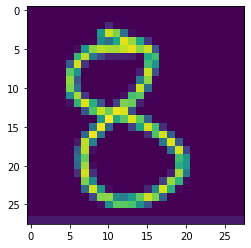

Ground Truth:  8
Predicted Digit Probabilities:  [[1.91857209e-04 7.49750257e-07 4.07278128e-02 8.70768070e-01
  1.64544656e-06 1.54777365e-02 6.69328801e-06 1.17989803e-05
  7.27698579e-02 4.38797288e-05]]
Predicted Digit:  3


In [ ]:
i = 8

custom_image = x_custom[i]
plt.imshow(custom_image)
plt.show()
print("Ground Truth: ", y_custom[i])

input = np.expand_dims(custom_image, axis = 0)
predicted_digit_probabilities = model.predict(input)
print("Predicted Digit Probabilities: ", predicted_digit_probabilities)

predicted_digit = np.argmax(predicted_digit_probabilities)
print("Predicted Digit: ", predicted_digit)


In [ ]:
print(np.asarray(x_custom).shape)

(10, 28, 28)


In [ ]:
custom_loss, custom_acc = model.evaluate(np.asarray(x_custom), np.asarray(y_custom), verbose = 2)
print('\nAccuracy on custom dataset: ', custom_acc)

1/1 - 0s - loss: 24.7867 - accuracy: 0.4000 - 20ms/epoch - 20ms/step

Accuracy on custom dataset:  0.4000000059604645
